# Qiskit Tutorial 11 - Matrizes de Densidade

Referências https://qiskit.org/documentation/stubs/qiskit.quantum_info.DensityMatrix.html

In [1]:
from qiskit import *
%matplotlib inline
import numpy as np

In [2]:
# Podemos encontrar o operador de densidade de estados

# Para isso vamos primeiramente usar o statevector_simulator para encontrar o vetor de 
# estado desejado

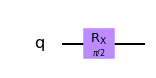

In [3]:
qc = QuantumCircuit(1)
qc.rx(np.pi/2,0)
qc.draw(output='mpl')

In [4]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc,backend)

In [5]:
result = job.result()
statevector = result.get_statevector()

In [6]:
# Aqui está o nosso vetor de estado
print(statevector)

[7.07106781e-01+0.j         4.32978028e-17-0.70710678j]


In [7]:
# Agora para encontrar o seu operador de densidade
from qiskit.quantum_info import *
op_densidade = DensityMatrix(statevector)

In [8]:
print(op_densidade.data)

[[5.000000e-01+0.j  3.061617e-17+0.5j]
 [3.061617e-17-0.5j 5.000000e-01+0.j ]]


## Propriedades

### Matrizes de densidade possuem traço unitário

In [9]:
# Podemos ver o traço do nosso operador
op_densidade.trace()

(1+0j)

### Matrizes de densidade são positivas semi-definidas

In [10]:
estado = [np.sqrt(2),np.sqrt(2)]
print(np.inner(np.inner(estado, op_densidade.data), estado))

(2+0j)


### tr($\rho^2$) $\leq$ 1

In [11]:
rho_2 = np.matmul(op_densidade.data,op_densidade.data)
trace = rho_2.trace()
print(trace)

(1+0j)


### Estado puro pertence a "casca" da esfera de bloch

In [38]:
def bloch_vector(op):
    pauli_x = [[0,1],[1,0]]
    pauli_y = [[0,-1j],[1j,0]]
    pauli_z = [[1,0],[0,-1]]
    
    x = np.matmul(op,pauli_x).trace()
    y = np.matmul(op,pauli_y).trace()
    z = np.matmul(op,pauli_z).trace()
    
    return [np.absolute(x),np.absolute(y),np.absolute(z)]

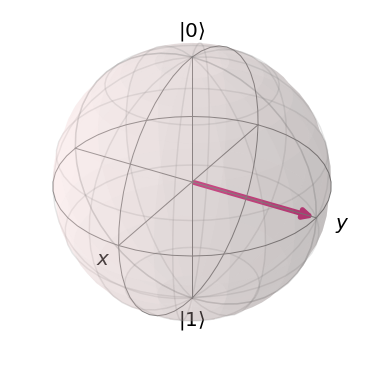

In [39]:
from qiskit.tools.visualization import plot_bloch_vector

plot_bloch_vector(bloch_vector(op_densidade.data))

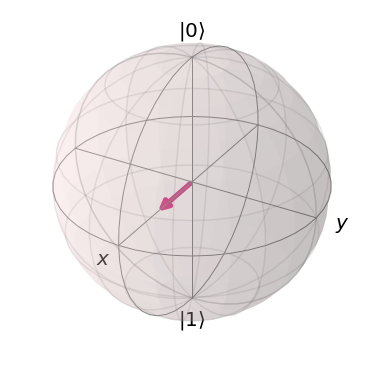

In [41]:
# Exemplo de estado misto:


estado_misto = [[0.5, 0.25],[0.25,0.5]]
plot_bloch_vector(bloch_vector(estado_misto))